<a href="https://colab.research.google.com/github/Hyun-ho-Lee/machine-learning-with/blob/main/titanic%20pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
import math
from google.colab import drive
drive.mount('/content/drvie')
from sklearn.preprocessing import LabelEncoder

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [4]:
titanic_df=pd.read_csv("/content/drvie/MyDrive/train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#결측값 처리 
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
titanic_df.isnull().sum().sum()

0

In [6]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
titanic_df['Cabin']
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

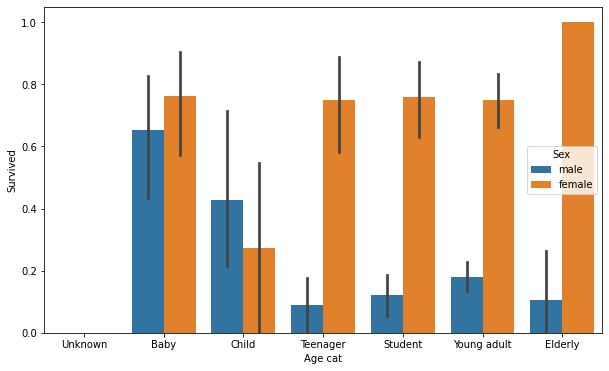

In [7]:
def get_category(age):
    cat=''
    if age<= -1:cat='Unknown'
    elif age<=5:cat='Baby'
    elif age<=12:cat='Child'
    elif age<=18:cat='Teenager'
    elif age<=25:cat='Student'
    elif age<=35:cat='Young adult'      
    elif age<=60:cat='Adult'
    else : cat='Elderly'
        
    return cat

plt.figure(figsize=(10,6))

group_names=['Unknown','Baby','Child','Teenager','Student','Young adult','Elderly']

titanic_df['Age cat']=titanic_df['Age'].apply(lambda x :get_category(x))

sns.barplot(x='Age cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)

In [8]:
from sklearn import preprocessing 

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        
        
    
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young adult


In [4]:
from sklearn.preprocessing import LabelEncoder 

#Null 처리 함수 

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#불필요한 속성 제거 

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df 

#레이블 인코딩 실행 

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features: 
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출

def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df
    

In [6]:
titanic_df=pd.read_csv("/content/drvie/MyDrive/train.csv")
titanic_df=transform_features(titanic_df)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [16]:
pip install pycaret

     |████████████████████████████████| 266kB 5.5MB/s 
     |████████████████████████████████| 276kB 7.6MB/s 
     |████████████████████████████████| 81kB 4.7MB/s 
     |████████████████████████████████| 215kB 6.6MB/s 
     |████████████████████████████████| 6.8MB 8.8MB/s 
     |████████████████████████████████| 1.7MB 44.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0MB 46.6MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
     |████████████████████████████████| 14.2MB 191kB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 245kB 33.0MB/s 
     |████████████████████████████████| 1.2MB 42.3MB/s 
     |████████████████████████████████| 153kB 53.8MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 378kB 46.8MB/s 
  

In [7]:
from pycaret.classification import * 

clf = setup(titanic_df, target='Survived', session_id=42)

,Description,Value
0,session_id,42
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 9)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8203,0.8552,0.6842,0.8018,0.7376,0.6025,0.6073,0.123
lightgbm,Light Gradient Boosting Machine,0.8187,0.8558,0.7103,0.7820,0.7421,0.6033,0.6070,0.100
lr,Logistic Regression,0.8058,0.8451,0.6931,0.7616,0.7243,0.5754,0.5780,0.427
ada,Ada Boost Classifier,0.8058,0.8304,0.7277,0.7421,0.7342,0.5813,0.5820,0.120
lda,Linear Discriminant Analysis,0.8058,0.8420,0.7062,0.7543,0.7283,0.5777,0.5795,0.023
ridge,Ridge Classifier,0.8026,0.0000,0.6888,0.7572,0.7206,0.5687,0.5708,0.022
rf,Random Forest Classifier,0.8012,0.8474,0.7147,0.7456,0.7276,0.5713,0.5738,0.520
et,Extra Trees Classifier,0.7899,0.8223,0.7018,0.7244,0.7110,0.5464,0.5484,0.466
dt,Decision Tree Classifier,0.7754,0.7528,0.6971,0.7040,0.6956,0.5183,0.5228,0.023
knn,K Neighbors Classifier,0.7094,0.7049,0.5332,0.6237,0.5704,0.3551,0.3601,0.121


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7619,0.7772,0.6250,0.7143,0.6667,0.4828,0.4854
1,0.7937,0.8630,0.6087,0.7778,0.6829,0.5333,0.5421
2,0.8571,0.9076,0.7391,0.8500,0.7907,0.6831,0.6869
3,0.9032,0.9114,0.7826,0.9474,0.8571,0.7850,0.7932
4,0.7903,0.8428,0.6522,0.7500,0.6977,0.5384,0.5415
5,0.7419,0.7274,0.5217,0.7059,0.6000,0.4158,0.4261
6,0.8226,0.8707,0.6957,0.8000,0.7442,0.6094,0.6129
7,0.7903,0.8885,0.6522,0.7500,0.6977,0.5384,0.5415
8,0.8226,0.7971,0.7391,0.7727,0.7556,0.6164,0.6168
9,0.9194,0.9666,0.8261,0.9500,0.8837,0.8225,0.8272


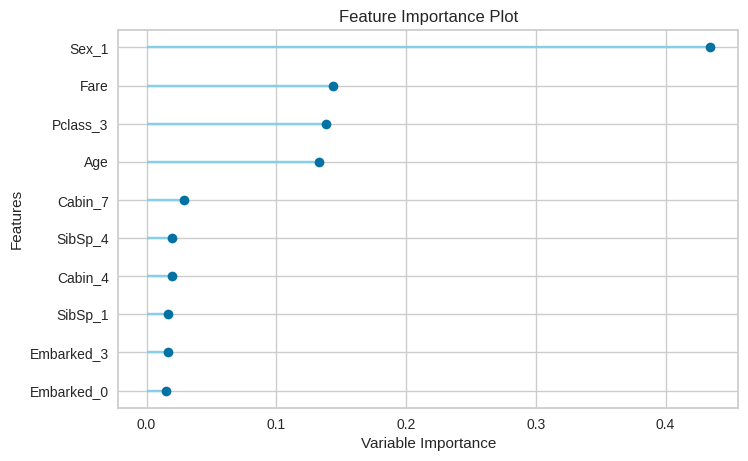

In [11]:
plot_model(estimator = gbc, plot = 'feature')

In [12]:
test_df=pd.read_csv("/content/drvie/MyDrive/test.csv")

In [14]:
test_df=transform_features(test_df)
test_df

KeyError: ignored

In [15]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,7.8292,7,1
1,3,0,47.00000,1,0,7.0000,7,2
2,2,1,62.00000,0,0,9.6875,7,1
3,3,1,27.00000,0,0,8.6625,7,2
4,3,0,22.00000,1,1,12.2875,7,2
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,7,2
414,1,0,39.00000,0,0,108.9000,2,0
415,3,1,38.50000,0,0,7.2500,7,2
416,3,1,30.27259,0,0,8.0500,7,2


In [16]:
gbc_final = finalize_model(gbc)

In [18]:
predict_cat = predict_model(gbc_final, test_df)

In [19]:
predict_cat.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Label,Score
0,3,1,34.5,0,0,7.8292,7,1,0,0.8846
1,3,0,47.0,1,0,7.0000,7,2,0,0.8556
2,2,1,62.0,0,0,9.6875,7,1,0,0.8334
